# Part 1: Data Preprocessing

Dataset Link: https://www.kaggle.com/datasets/patelprashant/employee-attrition

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Data Exploration

In [3]:
dataset.shape

(1470, 35)

In [4]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# categorical columns
print(f"The categorical columns are {dataset.select_dtypes(include='object').columns}")
print(f"Number of categorical columns {len(dataset.select_dtypes(include='object').columns)}")

The categorical columns are Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Number of categorical columns 9


In [7]:
# Numerical columns
print(f"The numerical columns are {dataset.select_dtypes(include=['int64', 'float64']).columns}")
print(f"Number of numerical columns {len(dataset.select_dtypes(include=['int64', 'float64']).columns)}")

The numerical columns are Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Number of numerical columns 26


In [8]:
# Statistical Summary
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The dataset represents employees with an average age of 36.92, an average daily rate of 802.49, and an average distance from home of 9.19 units. Most employees have a moderate level of education (average 2.91) and job satisfaction (average 65.89). The average job involvement is 2.73, and employees, on average, have around 11.28 years of total working experience. Work-life balance is moderately rated at 2.76. Notably, employees spend an average of 7.01 years at the company and 4.23 years in their current role. Further analysis can provide deeper insights.

## Dealing with missing values

In [9]:
print(f'Is there any missing values: {dataset.isnull().values.any()}')
print(f'Number of missing values: {dataset.isnull().values.sum()}')

Is there any missing values: False
Number of missing values: 0


## Restructuring of dataset

In [10]:
# drop below columns ( makes no sense for target variable prediction)
# 'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'
dataset = dataset.drop(columns = ['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'])

In [11]:
dataset.shape

(1470, 31)

## Encoding the Categorical data

In [12]:
# categorical data
print(f"The categorical columns are {dataset.select_dtypes(include='object').columns}")
print(f"Number of categorical columns {len(dataset.select_dtypes(include='object').columns)}")

The categorical columns are Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Number of categorical columns 8


In [13]:
cat_cols = dataset.select_dtypes(include='object').columns
for n in cat_cols:
  print(f'Unique values in { n } column is {dataset[n].unique()}')


Unique values in Attrition column is ['Yes' 'No']
Unique values in BusinessTravel column is ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department column is ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField column is ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender column is ['Female' 'Male']
Unique values in JobRole column is ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus column is ['Single' 'Married' 'Divorced']
Unique values in OverTime column is ['Yes' 'No']


## Countplot

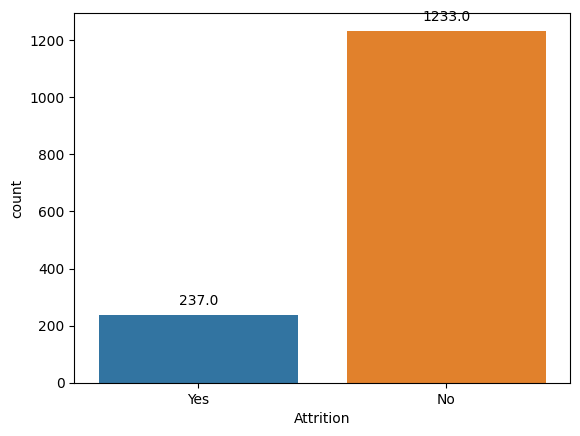

In [14]:
ax = sns.countplot(dataset, x = 'Attrition')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [15]:
print(f'Number of employees attrited : {(dataset.Attrition=="Yes").sum()}')
print(f'Number of employees not attrited : {(dataset.Attrition== "No").sum()}')

Number of employees attrited : 237
Number of employees not attrited : 1233


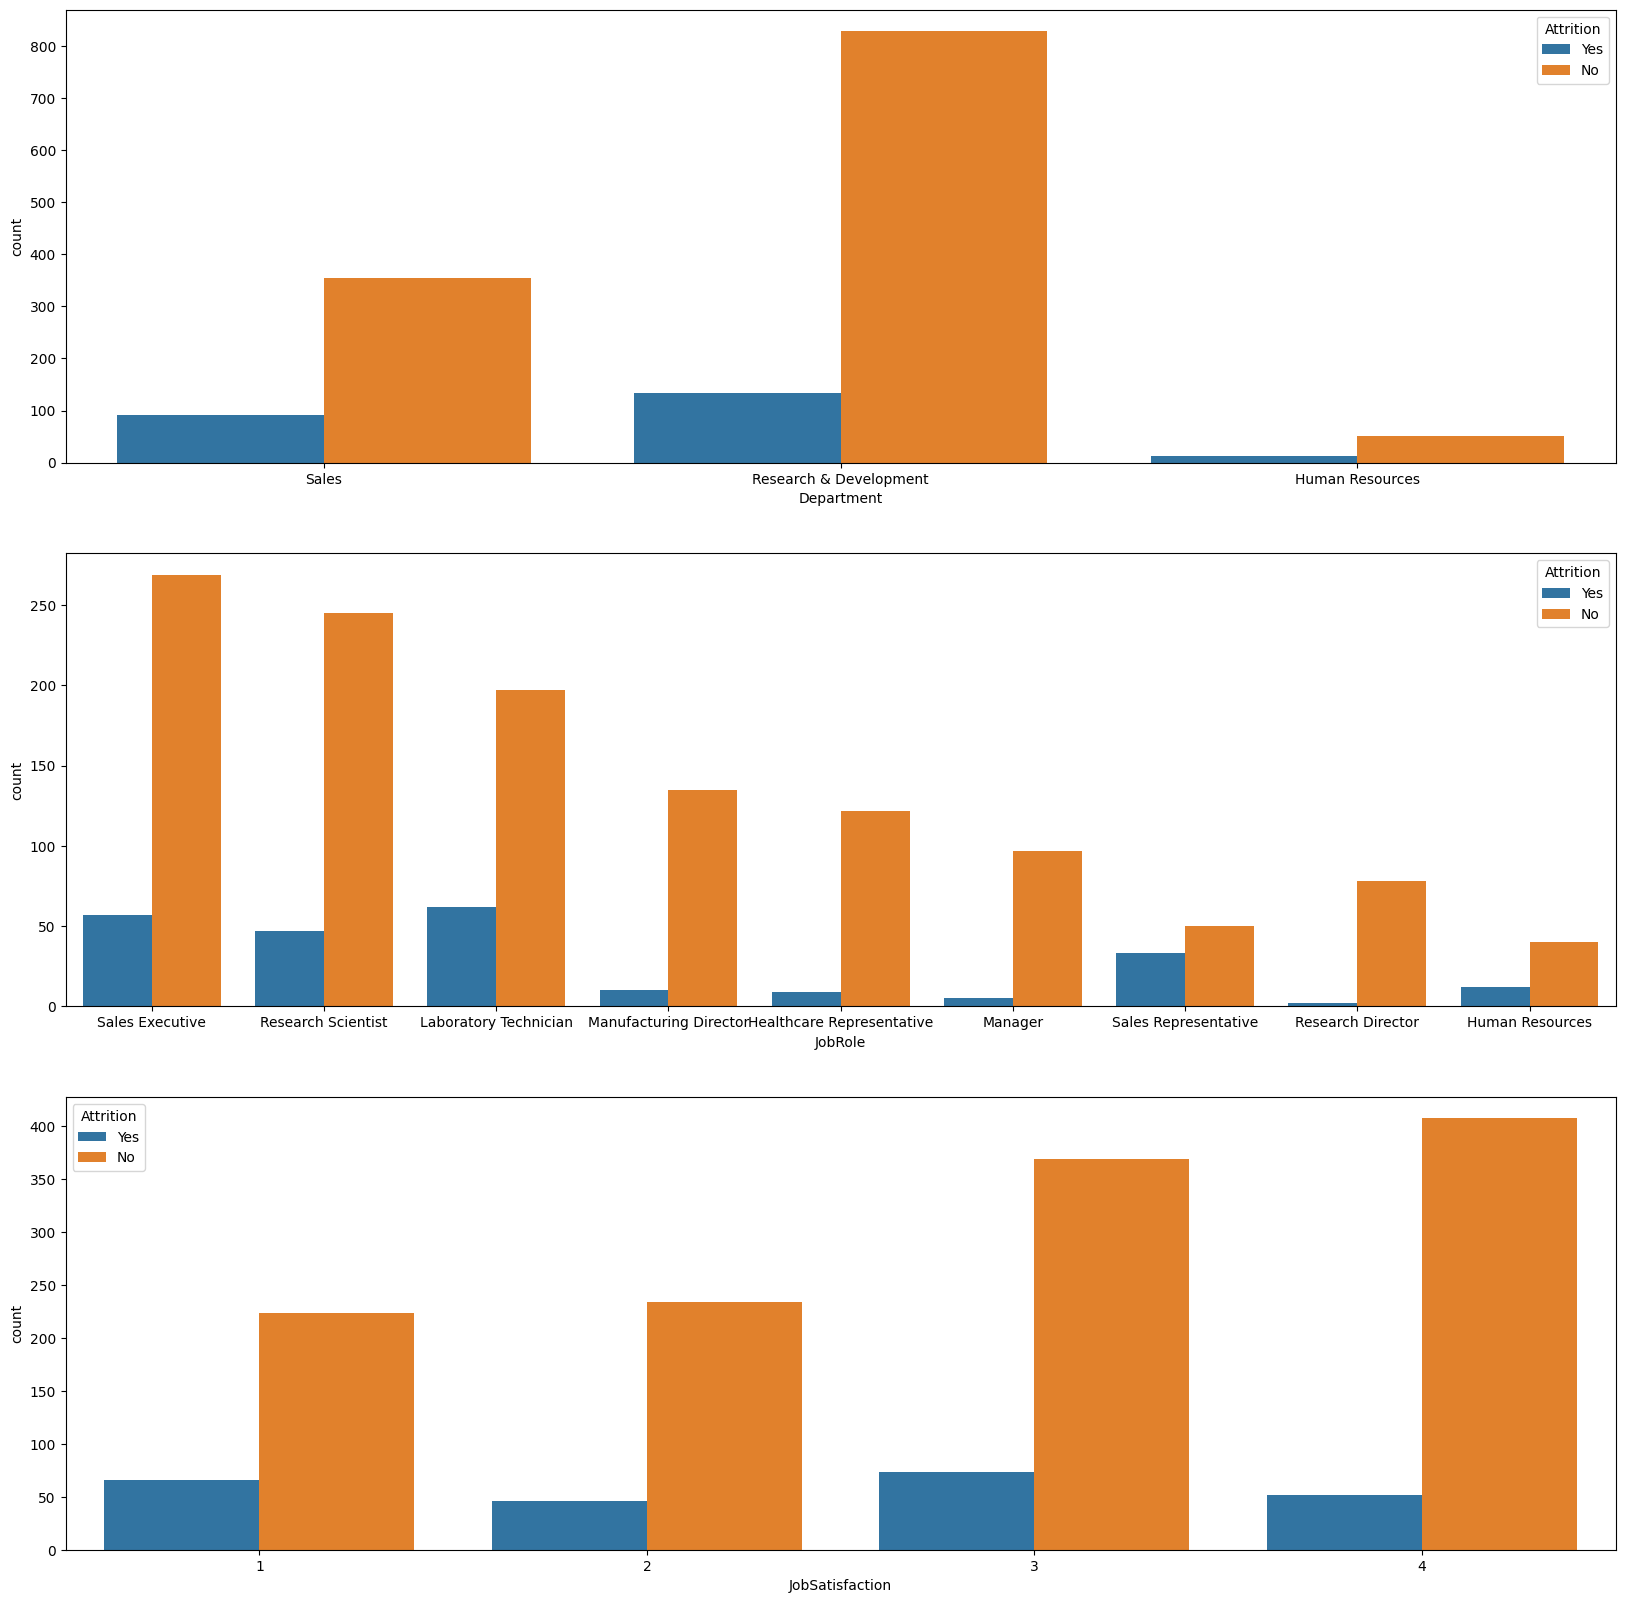

In [16]:
plt.figure(figsize = (20,20))

to_see = ['Department', 'JobRole','JobSatisfaction']

for n in to_see:
  plt.subplot(310 + int(to_see.index(n)) + 1  )
  sns.countplot(x = n, hue = 'Attrition', data = dataset)

## Correlation matrix and heatmap

In [17]:
corr = dataset.corr()

<ipython-input-17-6013ac24ef44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


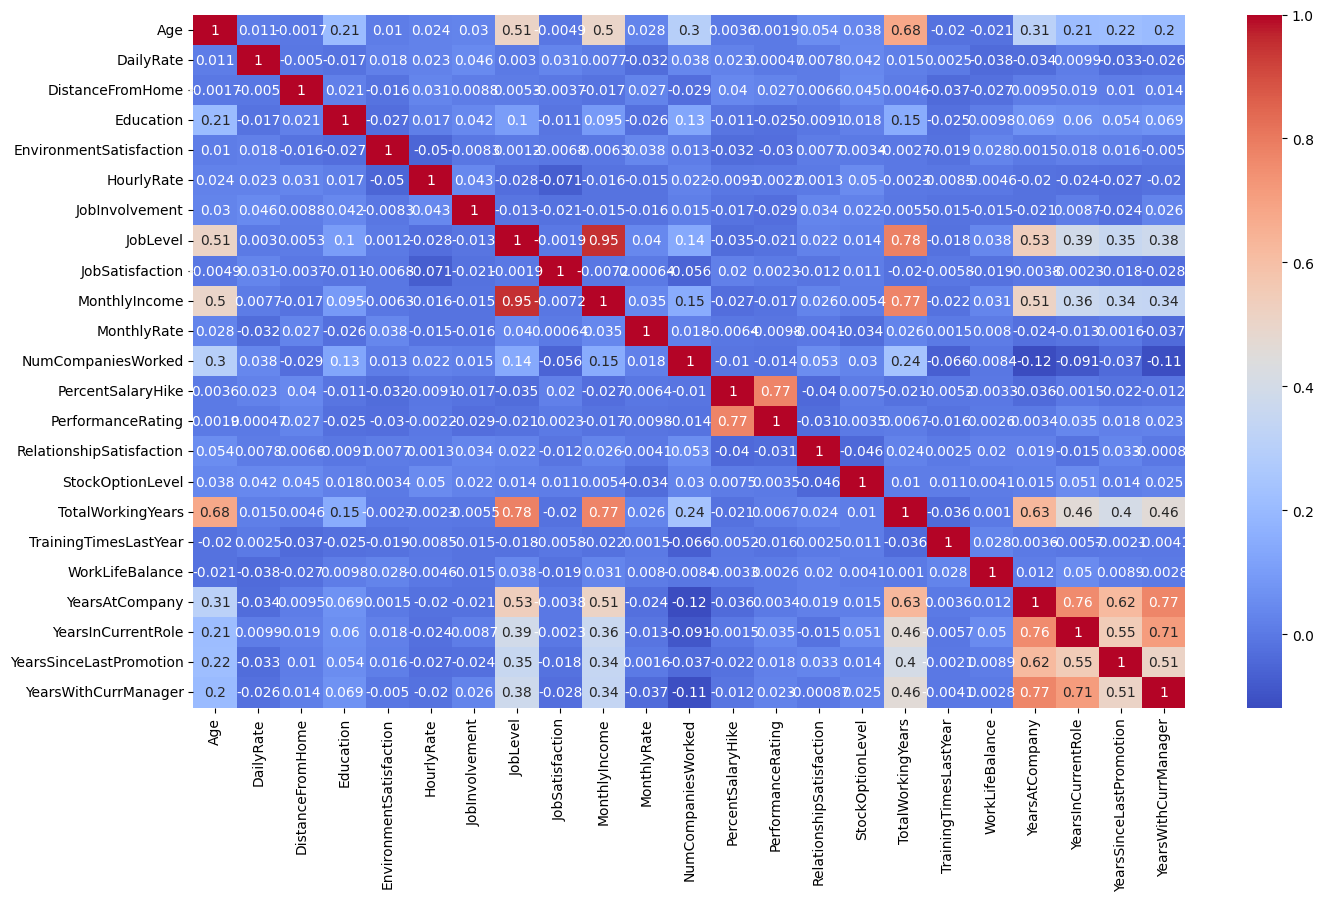

In [18]:
# correlation matrix
plt.figure(figsize = (16, 9))
ax = sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## Dealing with categorical data

In [19]:
# categorical data before encoding
print(f"The categorical columns are {dataset.select_dtypes(include='object').columns}")
print(f"Number of categorical columns {len(dataset.select_dtypes(include='object').columns)}")

The categorical columns are Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Number of categorical columns 8


In [20]:
dataset.shape

(1470, 31)

In [21]:
# one hot encoding
dataset = pd.get_dummies(data = dataset, drop_first = True)

In [22]:
dataset.shape

(1470, 45)

In [23]:
# categorical data before encoding
print(f"The categorical columns are {dataset.select_dtypes(include='object').columns}")
print(f"Number of categorical columns {len(dataset.select_dtypes(include='object').columns)}")

The categorical columns are Index([], dtype='object')
Number of categorical columns 0


In [24]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [25]:
dataset.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [26]:
dataset.rename(columns  ={'Attrition_Yes': "Attrition" }, inplace = True)


## Splitting the dataset into test and train dataset

In [27]:
# matrix of features
x = dataset.drop(columns = 'Attrition')

In [28]:
# target variable
y = dataset['Attrition']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(1176, 44)

(294, 44)

(1176,)

(294,)

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

In [37]:
x_test

array([[-0.08886552, -0.41164077,  0.10328995, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.41992946, -0.5595063 ,  1.94745459, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.19922017, -0.34510129,  1.08684442, ...,  1.11547067,
        -0.69900472,  1.62507442],
       ...,
       [-0.64063875, -1.36290899, -0.38848729, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377,  1.13108954, -0.88026453, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.06717794, -0.14259867, ...,  1.11547067,
        -0.69900472,  1.62507442]])

# Part 2: Model Selection

## 1) Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)
y_pred = classifier_lr.predict(x_test)
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
results = pd.DataFrame([["Logistic Regression", acc, f1, prec, rec]],
                       columns =
                       ['Model', 'Accuracy', "F1", 'Precision', "Recall"])
display(results)
cm = confusion_matrix(y_test, y_pred)
cm

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.884354,0.575,0.741935,0.469388


array([[237,   8],
       [ 26,  23]])

## 2) SVM

In [39]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state = 0)
classifier_svc.fit(x_train, y_train)
y_pred = classifier_svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_res = pd.DataFrame([['SVM',acc, f1, prec, rec]],
              columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
display(model_res)
cm = confusion_matrix(y_test, y_pred)
cm

,Model,Accuracy,F1,Precision,Recall
0,SVM,0.867347,0.380952,0.857143,0.244898


array([[243,   2],
       [ 37,  12]])

## 3) Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm = RandomForestClassifier(random_state = 0)
classifier_rm.fit(x_train, y_train)
y_pred = classifier_rm.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_results = pd.DataFrame([["Random Forest", acc, f1, prec, rec]],
                             columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
display(model_results)
cm = confusion_matrix(y_test, y_pred)
cm

,Model,Accuracy,F1,Precision,Recall
0,Random Forest,0.857143,0.3,0.818182,0.183673


array([[243,   2],
       [ 40,   9]])

## 4) XGBoost Classifier

In [41]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(random_state = 0)
classifier_xg.fit(x_train, y_train)
y_pred = classifier_rm.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
model_results_xg = pd.DataFrame([['XGBoost Classification', acc, f1, prec, rec]],
                                columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
display(model_results_xg)
cm = confusion_matrix(y_test, y_pred)
cm

,Model,Accuracy,F1,Precision,Recall
0,XGBoost Classification,0.857143,0.3,0.818182,0.183673


array([[243,   2],
       [ 40,   9]])

Logistic Regression is better performing on accuracy score

# Part 3: Randomized Search to find the best parameters ( Logistic Regression )

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [ 50, 100, 500, 2000, 5000]

}

In [44]:
parameters

{'penalty': ['l1', 'l2', 'elasticnet', None],
 'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'max_iter': [50, 100, 500, 2000, 5000]}

In [50]:
random_cv = RandomizedSearchCV(estimator = classifier_lr, param_distributions=parameters, n_iter = 10, scoring = 'roc_auc',n_jobs = -1, cv = 5, verbose = 3)

In [51]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'max_iter': [50, 100, 500, 2000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [52]:
random_cv.best_estimator_

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [53]:
random_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 1.0}

In [49]:
random_cv.best_score_

0.8220680459927052

# Part 4: Final Model

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [55]:
y_pred = classifier.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred)

0.8843537414965986

In [57]:
confusion_matrix(y_test, y_pred)

array([[237,   8],
       [ 26,  23]])

# Part 5: Predicting a single variable

In [58]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [59]:
single_obs = [[41, 1102,	1, 2,	2,	94,	3,	2,	4,	5993,	19479,	8,	11,	3,	1,	0,	8,	0,	1,	6,	4,	0,	5,
               0,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1]]

In [60]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [61]:
# Leave the company